## Project Title: Investigate Airbnb data for Boston and Seattle homestay Activities


### Aim
This project is about gaining insights from data using data analytics/ data science skills.
 

### Brief Description:
Two datasets are used. Each contains the listing activity of homestays in Seattle, and Boston for Airbnb users.
Each city has three datasets with the following titles and descriptions:

Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day

Data used and indepth description are found here for 
[Seattle Airbnb](https://www.kaggle.com/airbnb/seattle/data) and [Boston Airbnb.](https://www.kaggle.com/airbnb/boston)

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import time
%matplotlib inline

In [2]:
# Load Seattle data
seattle_calendar = pd.read_csv('seattle/calendar.csv')
seattle_listing = pd.read_csv('seattle/listings.csv')
seattle_review = pd.read_csv('seattle/reviews.csv')

In [3]:
# Load Boston data
boston_calendar = pd.read_csv('boston/calendar.csv')
boston_listing = pd.read_csv('boston/listings.csv')
boston_reviews = pd.read_csv('boston/reviews.csv')

In [4]:
boston_calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
# Number of rows and columns in boston_calendar dataset
boston_calendar.shape

(1308890, 4)

In [6]:
boston_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [7]:
# Explore the unique cities in boston_listing
boston_listing.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Watertown', 'Brighton',
       'Brighton ', 'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park',
       'Mattapan', 'Milton', 'Dorchester', 'dorchester, boston ',
       'South Boston', 'Allston', 'ALLSTON'], dtype=object)

In [8]:
# Explore the unique values in seattle_listing
seattle_listing.city.unique()

array(['Seattle', 'Ballard, Seattle', 'West Seattle', 'Seattle ', '西雅图',
       'Phinney Ridge Seattle', 'seattle'], dtype=object)

In [9]:
boston_listing.shape

(3585, 95)

In [10]:
# Check the first five rows of data
boston_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [11]:
# Check the number of rows and columns
boston_reviews.shape

(68275, 6)

In [12]:
# Check first five rows
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [13]:
# Check data info
seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [14]:
# Check the first five rows
seattle_listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [15]:
# Check data info
seattle_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [16]:
seattle_review.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [17]:
seattle_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [18]:
# Helper function to concatenate dataframes
def concat_df(df_1, df_2):
    '''
    Input: two dataframes of same features
    
    Output: one dataframe derived from the concatenation of two dataframes of same features
    '''
    return pd.concat([df_1, df_2]).reset_index(drop = True)

In [19]:
# Get a new concatenated dataframe
seattle_boston_cal = concat_df(seattle_calendar, boston_calendar)
seattle_boston_cal

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
2702455,14504422,2016-09-10,f,NaN
2702456,14504422,2016-09-09,f,NaN
2702457,14504422,2016-09-08,f,NaN
2702458,14504422,2016-09-07,f,NaN


In [20]:
# Check unique values in available column
seattle_boston_cal.available.unique()

array(['t', 'f'], dtype=object)

In [21]:
# Explore percentage of missing data
seattle_boston_cal.isna().sum()/seattle_boston_cal.shape[0]*100

listing_id     0.000000
date           0.000000
available      0.000000
price         41.624335
dtype: float64

In [22]:
# Concatenate seattle_review, boston_reviews
seattle_boston_listing = concat_df(seattle_listing, boston_listing)
seattle_boston_listing

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,access,interaction,house_rules
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,WASHINGTON,f,moderate,f,f,2,4.07,NaN,NaN,NaN
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,WASHINGTON,f,strict,t,t,6,1.48,NaN,NaN,NaN
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,WASHINGTON,f,strict,f,f,2,1.15,NaN,NaN,NaN
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,WASHINGTON,f,flexible,f,f,1,NaN,NaN,NaN,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,WASHINGTON,f,strict,f,f,1,0.89,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,NaN,t,strict,f,f,8,0.34,NaN,NaN,1. No damage to the house or furniture 2. No S...
7399,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,NaN,f,strict,f,f,2,NaN,NaN,NaN,NaN
7400,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,NaN,f,flexible,f,f,1,NaN,The whole place including social areas is your...,NaN,NaN
7401,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,NaN,f,strict,f,f,1,2.00,NaN,NaN,NaN


In [23]:
# Concatenate seattle_review, boston_reviews
seattle_boston_reviews = concat_df(seattle_review, boston_reviews)
seattle_boston_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
153119,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
153120,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
153121,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
153122,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


In [24]:
seattle_boston_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153124 entries, 0 to 153123
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     153124 non-null  int64 
 1   id             153124 non-null  int64 
 2   date           153124 non-null  object
 3   reviewer_id    153124 non-null  int64 
 4   reviewer_name  153124 non-null  object
 5   comments       153053 non-null  object
dtypes: int64(3), object(3)
memory usage: 7.0+ MB


In [25]:
# Percentage of missing values
seattle_boston_reviews.isna().sum()/seattle_boston_reviews.shape[0]*100

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.046368
dtype: float64

In [26]:
seattle_boston_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702460 entries, 0 to 2702459
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   listing_id  int64 
 1   date        object
 2   available   object
 3   price       object
dtypes: int64(1), object(3)
memory usage: 82.5+ MB


In [27]:
# Check Unique values in price
seattle_boston_cal.price.unique()

array(['$85.00', nan, '$125.00', ..., '$1,030.00', '$2,895.00', '$11.00'],
      dtype=object)

In [28]:
seattle_boston_cal.available.unique()

array(['t', 'f'], dtype=object)

In [29]:
# Get data info
seattle_boston_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                7403 non-null   int64  
 1   listing_url                       7403 non-null   object 
 2   scrape_id                         7403 non-null   int64  
 3   last_scraped                      7403 non-null   object 
 4   name                              7403 non-null   object 
 5   summary                           7083 non-null   object 
 6   space                             5777 non-null   object 
 7   description                       7403 non-null   object 
 8   experiences_offered               7403 non-null   object 
 9   neighborhood_overview             4956 non-null   object 
 10  notes                             3822 non-null   object 
 11  transit                           5179 non-null   object 
 12  thumbn

In [30]:
# Manually investigate data
pd.set_option('display.max_columns', 100)
seattle_boston_listing.sample(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,access,interaction,house_rules
1483,7332364,https://www.airbnb.com/rooms/7332364,20160104002432,2016-01-04,Luxury Condo in Downtown Seattle,1300 sq. ft. luxury condo located in the heart...,1300 square foot 1BR/1.5BA luxurious condo uni...,1300 sq. ft. luxury condo located in the heart...,none,NaN,NaN,Convenient public transportation! Walking dist...,https://a2.muscache.com/ac/pictures/93287073/e...,https://a2.muscache.com/im/pictures/93287073/e...,https://a2.muscache.com/ac/pictures/93287073/e...,https://a2.muscache.com/ac/pictures/93287073/e...,26498843,https://www.airbnb.com/users/show/26498843,Amy,2015-01-21,"Seattle, Washington, United States",NaN,a few days or more,17%,100%,f,https://a1.muscache.com/ac/users/26498843/prof...,https://a1.muscache.com/ac/users/26498843/prof...,Central Business District,2.0,2.0,"['email', 'phone', 'reviews']",t,f,"Olive Way, Seattle, WA 98101, United States",Central Business District,Central Business District,Downtown,Seattle,WA,98101,Seattle,"Seattle, WA",US,United States,47.614344,-122.332938,t,Apartment,Entire home/apt,3,1.5,1.0,1.0,Real Bed,"{TV,""Wireless Internet"",""Air Conditioning"",Poo...",NaN,$300.00,"$1,500.00","$4,500.00","$1,000.00",$100.00,0,$0.00,2,1125,4 months ago,t,0,0,0,148,2016-01-04,1,2015-09-29,2015-09-29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,0.31,NaN,NaN,NaN
7093,12208307,https://www.airbnb.com/rooms/12208307,20160906204935,2016-09-07,South Boston Apartment,10 minute walk from Broadway Station on the re...,NaN,10 minute walk from Broadway Station on the re...,none,NaN,NaN,NaN,https://a2.muscache.com/im/pictures/271b6df5-5...,https://a2.muscache.com/im/pictures/271b6df5-5...,https://a2.muscache.com/im/pictures/271b6df5-5...,https://a2.muscache.com/im/pictures/271b6df5-5...,34122490,https://www.airbnb.com/users/show/34122490,Ben,2015-05-24,"Boston, Massachusetts, United States",NaN,NaN,NaN,NaN,f,https://a2.muscache.com/im/users/34122490/prof...,https://a2.muscache.com/im/users/34122490/prof...,South Boston,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Gold Street, Boston, MA 02127, United States",South Boston,South Boston,NaN,Boston,MA,02127,Boston,"Boston, MA",US,United States,42.334778,-71.048581,t,Apartment,Private room,1,1.0,1.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,$70.00,NaN,NaN,NaN,NaN,1,$0.00,1,1125,3 months ago,NaN,0,0,0,0,2016-09-06,1,2016-06-21,2016-06-21,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,flexible,f,f,1,0.38,NaN,NaN,NaN
3667,53803,https://www.airbnb.com/rooms/53803,20160104002432,2016-01-04,Amazing 3

In [31]:
# Explore number of unique values across all columns  
pd.set_option('display.max_rows', 100)
seattle_boston_listing.nunique()

id                                  7403
listing_url                         7403
scrape_id                              2
last_scraped                           2
name                                7296
summary                             6591
space                               5387
description                         7165
experiences_offered                    1
neighborhood_overview               4233
notes                               3267
transit                             4432
thumbnail_url                       6484
medium_url                          6484
picture_url                         7403
xl_picture_url                      6484
host_id                             4929
host_url                            4929
host_name                           2347
host_since                          1845
host_location                        277
host_about                          3250
host_response_time                     4
host_response_rate                    58
host_acceptance_

In [32]:
# Check for possible binary columns
seattle_boston_listing[seattle_boston_listing.columns[seattle_boston_listing.nunique()==2]].head()
# set(df.columns[df.isnull().mean()==0])

,scrape_id,last_scraped,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,calendar_last_scraped,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,20160104002432,2016-01-04,f,t,t,t,2016-01-04,f,f,f
1,20160104002432,2016-01-04,t,t,t,t,2016-01-04,f,t,t
2,20160104002432,2016-01-04,f,t,t,t,2016-01-04,f,f,f
3,20160104002432,2016-01-04,f,t,t,t,2016-01-04,f,f,f
4,20160104002432,2016-01-04,f,t,t,t,2016-01-04,f,f,f


In [33]:
# Investigate percentage of missingness
(seattle_boston_listing.isna().sum()/seattle_boston_listing.shape[0]*100).sort_values(ascending = False)

license                             100.000000
square_feet                          97.933270
interaction                          72.565176
access                               71.687154
house_rules                          67.675267
monthly_price                        67.513170
weekly_price                         60.813184
security_deposit                     56.666216
jurisdiction_names                   48.426314
neighbourhood_group_cleansed         48.426314
has_availability                     48.426314
notes                                48.372282
neighborhood_overview                33.054167
transit                              30.041875
host_about                           29.285425
cleaning_fee                         28.866676
space                                21.964069
review_scores_accuracy               20.005403
review_scores_checkin                19.964879
review_scores_value                  19.951371
review_scores_location               19.951371
review_scores

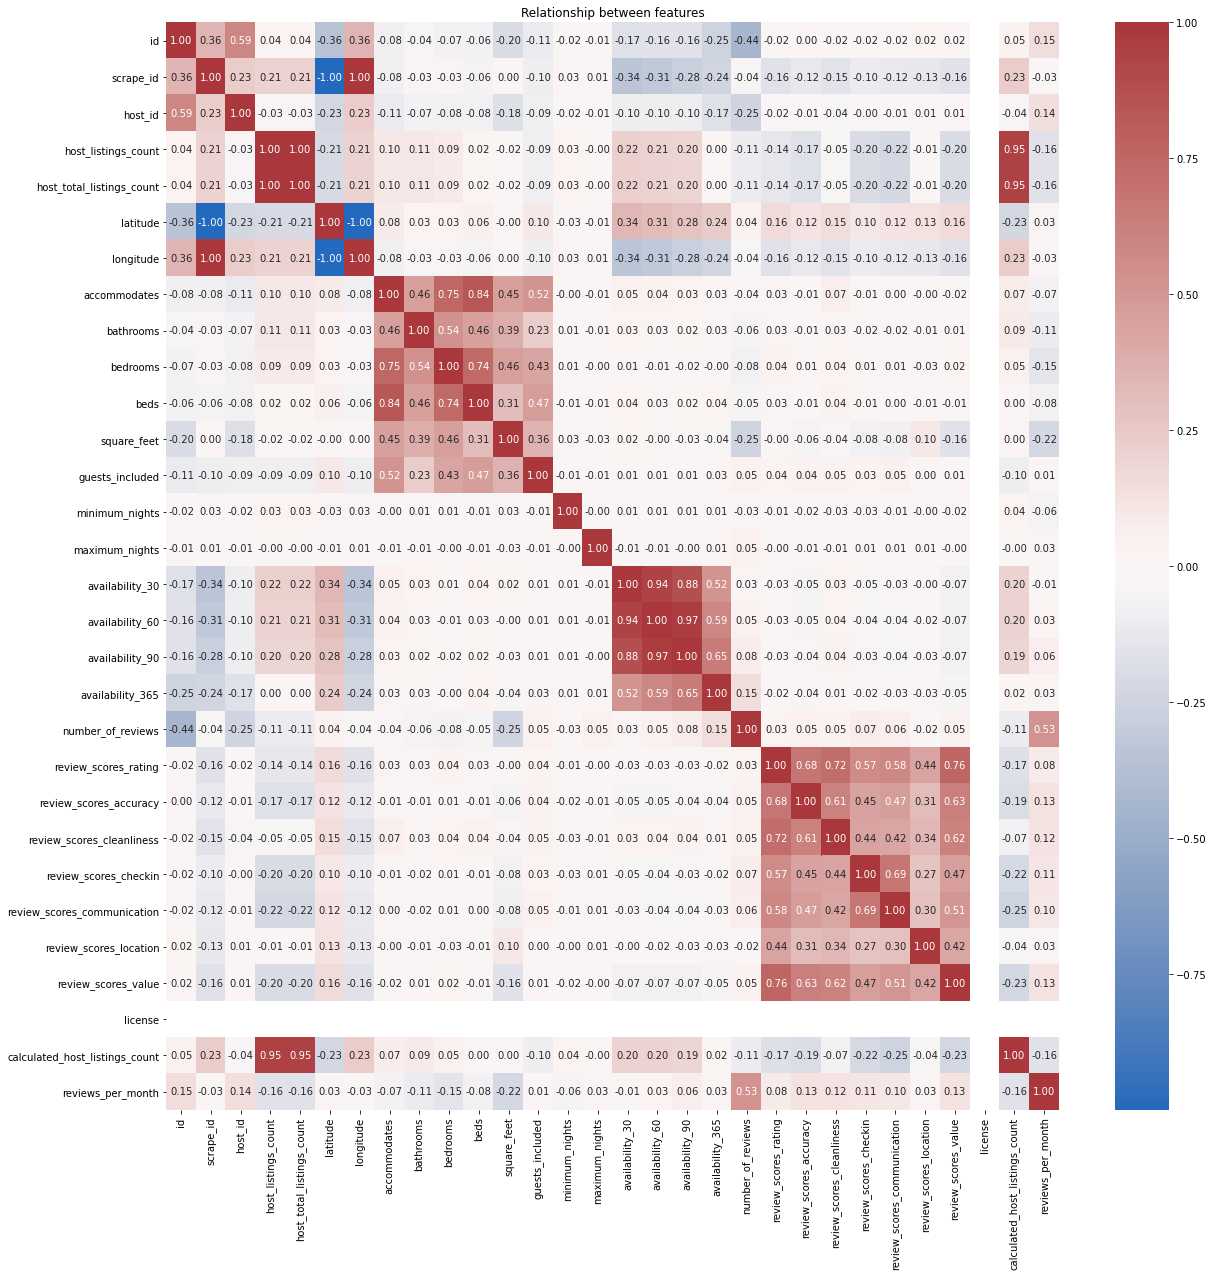

In [34]:
# Visualise correlation of features
plt.figure(figsize=[20, 20])
sns.heatmap(seattle_boston_listing.corr(), annot=True, fmt='.2f', cmap='vlag');
plt.title('Relationship between features');

## Data Quality Issues


1. The following columns are object instead of float: `cleaning_fee`, `monthly_price`, `security_deposit`, `price`, `weekly_price`, `extra_people`
2. Drop the following columns: `license`, `experiences_offered`, `jurisdiction_names`, `requires_license`, `has_availability`, `country`, `country_code`
3. The following columns should be binary: `available`,`host_is_superhost` ,`host_has_profile_pic`, `host_identity_verified`, `is_location_exact`, `instant_bookable`, `require_guest_profile_picture`, `require_guest_phone_verification`
4. The following columns are object instead of datetype: `date`, `last_scraped`, `calendar_last_scraped`, `host_since`, `first_review`, `last_review`
5. The following should be int instead of object: `host_response_rate`, `host_acceptance_rate`, 
6. I don't believe the following are important for my analysis and should be dropped: `listing_url`, `thumbnail_url`, `medium_url`, `picture_url`, `xl_picture_ur`, `host_url`, `host_thumbnail_url`, `host_picture_url`, `longitude`, `latitude`
7. NaNs in columns
8. `city` column should have binary values: Seattle and Boston

In [35]:
# Get copies of old dataframes for wrangling
df_listing = seattle_boston_listing.copy()
df_reviews = seattle_boston_reviews.copy()
df_calendar = seattle_boston_cal.copy()

In [36]:
# Drop unwanted variables
df_listing.drop(['license', 
                'experiences_offered', 
                'jurisdiction_names', 
                'requires_license', 
                'has_availability', 
                'country', 
                'country_code', 
                'listing_url', 
                'thumbnail_url', 
                'medium_url', 
                'picture_url', 
                'xl_picture_url', 
                'host_url', 
                'host_thumbnail_url', 
                'host_picture_url', 
                'longitude', 
                'latitude'], axis = 1, inplace = True)

In [37]:
# Get an overview of values for each of the following columns
seattle_boston_listing[['cleaning_fee', 'monthly_price', 'security_deposit', 'price', 'weekly_price', 'extra_people']].head()

,cleaning_fee,monthly_price,security_deposit,price,weekly_price,extra_people
0,NaN,NaN,NaN,$85.00,NaN,$5.00
1,$40.00,"$3,000.00",$100.00,$150.00,"$1,000.00",$0.00
2,$300.00,NaN,"$1,000.00",$975.00,NaN,$25.00
3,NaN,"$2,300.00",NaN,$100.00,$650.00,$0.00
4,$125.00,NaN,$700.00,$450.00,NaN,$15.00


In [38]:
# Strip $ from values and incorporate it in column name
start = time.time()
cols = ['cleaning_fee', 'monthly_price', 'security_deposit', 'price', 'weekly_price', 'extra_people']
for col in cols:
    df_listing[col] = df_listing[col].str.strip('$').str.replace(',', '').astype(float)
    df_listing = df_listing.rename(columns = {col: col+'($)'})
end = time.time() - start
print(f'Took {end:.2f}secs to execute')

Took 0.16secs to execute


In [39]:
# Strip $ from values and incorporate it in column name
df_calendar['price'] = df_calendar['price'].str.strip('$').str.replace(',', '').astype(float)
df_calendar= df_calendar.rename(columns={'price': 'price($)'})

In [40]:
start = time.time()
date_cols = ['last_scraped', 'calendar_last_scraped', 'host_since', 'first_review', 'last_review']
for col in date_cols:
    df_listing[col] = pd.to_datetime(df_listing[col]) # Change dtype to datetime
end = time.time() - start
print(f'Took {end:.2f}secs to execute')

Took 0.04secs to execute


In [41]:
# Change dtype to datetime
df_calendar['date'] = pd.to_datetime(df_calendar['date'])
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

In [42]:
# Investigate values of these columns
df_listing[['host_response_rate', 'host_acceptance_rate']].sample(3)

,host_response_rate,host_acceptance_rate
5822,100%,91%
833,100%,100%
2801,100%,100%


In [43]:
start = time.time()
percent_cols = ['host_response_rate', 'host_acceptance_rate']
for col in percent_cols:
    
    df_listing[col] = df_listing[col].str.strip('%').astype(float) #Strip % from values
    df_listing = df_listing.rename(columns = {col: col+'(%)'}) # Incorporate % in column names
end = time.time() - start
print(f'Took {end:.2f}secs to execute')

Took 0.05secs to execute


In [44]:
# Print first five rows
df_listing.head()

,id,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price($),weekly_price($),monthly_price($),security_deposit($),cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,access,interaction,house_rules
0,241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96.0,100.0,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07,NaN,NaN,NaN
1,953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48,NaN,NaN,NaN
2,3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67.0,100.0,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,5 weeks ago,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15,NaN,NaN,NaN
3,7421966,201601

In [45]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                7403 non-null   int64         
 1   scrape_id                         7403 non-null   int64         
 2   last_scraped                      7403 non-null   datetime64[ns]
 3   name                              7403 non-null   object        
 4   summary                           7083 non-null   object        
 5   space                             5777 non-null   object        
 6   description                       7403 non-null   object        
 7   neighborhood_overview             4956 non-null   object        
 8   notes                             3822 non-null   object        
 9   transit                           5179 non-null   object        
 10  host_id                           7403 non-null 

In [46]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702460 entries, 0 to 2702459
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price($)    float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 82.5+ MB


In [47]:
# Check for nulls
df_calendar.isna().sum()

listing_id          0
date                0
available           0
price($)      1124881
dtype: int64

In [48]:
# Investigate source of missing data
df_calendar['price($)'].isna().groupby(df_calendar['available']).mean()

available
f     True
t    False
Name: price($), dtype: bool

In [49]:
# Check the percentage of missingness
(df_calendar.available=='f').mean()*100

41.6243348652709

The missing data in price column is known as Structurally Missing Data. Values are missing when `available` is false (f).

In [50]:
# Drop missing data from target column
df_calendar.dropna(subset=['price($)'], inplace=True)

In [51]:
# Confirm datatypes in review dataset
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153124 entries, 0 to 153123
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   listing_id     153124 non-null  int64         
 1   id             153124 non-null  int64         
 2   date           153124 non-null  datetime64[ns]
 3   reviewer_id    153124 non-null  int64         
 4   reviewer_name  153124 non-null  object        
 5   comments       153053 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 7.0+ MB


In [52]:
# Investigate percentage of missingness in review dataset
df_reviews.isna().sum()/df_reviews.shape[0]*100

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.046368
dtype: float64

In [53]:
# Investigate missing comments
df_reviews[df_reviews.comments.isna()]

,listing_id,id,date,reviewer_id,reviewer_name,comments
11034,461567,11614247,2014-04-09,12120141,Abbey,NaN
15383,9460,10563024,2014-02-24,12498029,Debra,NaN
15914,2906694,48629316,2015-09-27,44218980,Anush,NaN
16097,910784,9950520,2014-01-21,179481,Enrico,NaN
27280,10695,52378,2010-06-13,105412,Wei,NaN
29467,1018204,10024984,2014-01-26,10571694,Jordan,NaN
30619,6079216,34824019,2015-06-12,31556342,Mack,NaN
31414,3354614,18103248,2014-08-21,12426758,Jeff,NaN
35210,3554558,24863045,2015-01-03,24488791,Eleanor,NaN
37971,1790020,15640556,2014-07-13,16884291,Michael,NaN


I think missing values in `comments` are caused by technical issues because the essence of review is for comments. There is no reason these data should be missing since it is on record that reviews were
made.

In [54]:
# Change to Boston all cities related to Boston 
df_listing.city = df_listing.city.replace(
    df_listing.loc[np.where(df_listing.city.isin(
        boston_listing.city.unique())), 'city'].values, 'Boston')

In [55]:
# Change to Seattle all cities related to Seattle 
df_listing.city = df_listing.city.replace(
    df_listing.loc[np.where(df_listing.city.isin(
        seattle_listing.city.unique())), 'city'].values, 'Seattle')

## Data Exploration

In [56]:
df_listing.describe()

,id,scrape_id,host_id,host_response_rate(%),host_acceptance_rate(%),host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price($),weekly_price($),monthly_price($),security_deposit($),cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,7.403000e+03,7.403000e+03,7.403000e+03,6409.000000,6159.000000,7401.000000,7401.000000,7403.000000,7373.000000,7387.000000,7393.000000,153.000000,7403.000000,2901.000000,2405.000000,3208.000000,5266.000000,7403.000000,7403.000000,7403.000000,7.403000e+03,7403.000000,7403.000000,7403.000000,7403.000000,7403.000000,5943.000000,5922.000000,5932.000000,5925.000000,5934.000000,5926.000000,5926.000000,7403.000000,6020.000000
mean,6.950001e+06,2.016049e+13,2.021053e+07,94.936496,91.981653,32.222537,32.222537,3.200189,1.241150,1.282659,1.674286,856.026144,150.227881,829.656670,3011.648233,303.125312,64.849221,1.555045,10.773470,2.757666,1.431337e+04,12.846143,29.559773,48.627583,213.089153,20.684047,93.316002,9.540865,9.417229,9.721181,9.733569,9.518056,9.319777,7.686073,2.028161
std,4.052397e+06,4.009296e+08,1.962309e+07,12.186500,17.429163,123.585161,123.585161,1.890166,0.549408,0.823251,1.081355,647.189653,124.019680,577.062778,2290.115087,296.689874,50.112558,1.200756,18.352897,13.243828,1.162232e+06,12.069956,23.839400,35.013315,138.342837,36.733024,8.207451,0.821783,0.999271,0.682247,0.656589,0.775312,0.892824,21.465871,1.968696
min,3.335000e+03,2.016010e+13,4.193000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,80.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000
25%,3.864100e+06,2.016010e+13,4.343164e+06,97.000000,94.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,420.000000,79.000000,458.000000,1595.000000,149.750000,25.000000,1.000000,0.000000,1.000000,9.550000e+01,0.000000,1.000000,7.000000,77.000000,1.000000,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.590000
50%,7.035240e+06,2.016010e+13,1.448650e+07,100.000000,100.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,770.000000,120.000000,660.000000,2400.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1.125000e+03,10.000000,31.000000,56.000000,259.000000,7.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.000000,1.370000
75%,9.500804e+06,2.016091e+13,3.028359e+07,100.000000,100.000000,4.000000,4.000000,4.000000,1.000000,2.000000,2.000000,1200.000000,190.000000,1000.000000,3500.000000,400.000000,95.000000,2.000000,20.000000,3.000000,1.125000e+03,26.000000,55.000000,84.000000,347.000000,23.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000,2.890000
max,1.493346e+07,2.016091e+13,9.385411e+07,100.000000,100.000000,749.000000,749.000000,16.000000,8.000000,7.000000,16.000000,3000.000000,4000.000000,6300.000000,40000.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,1.000000e+08,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,136.000000,19.150000


This summary statistics indicates most of the numerical columns are skewed; most especially `host_listings_count`, `host_total_listings_count` with 749 as maximum value respectively
and `price($)`with minimum value of 10 and maximum value of 4000

In [57]:
df_listing.head()

,id,scrape_id,last_scraped,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate(%),host_acceptance_rate(%),host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price($),weekly_price($),monthly_price($),security_deposit($),cleaning_fee($),guests_included,extra_people($),minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,access,interaction,house_rules
0,241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96.0,100.0,f,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,5.0,1,365,4 weeks ago,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07,NaN,NaN,NaN
1,953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98.0,100.0,t,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48,NaN,NaN,NaN
2,3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67.0,100.0,f,Queen Anne,2.0,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,975.0,NaN,NaN,1000.0,300.0,10,25.0,4,30,5 weeks ago,1,6,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15,NaN,NaN,NaN
3,7421966,201601

## Data Visualisation and Analysis

### QUESTION 1: Which of the cities has a higher frequent(modal) price for home-stay

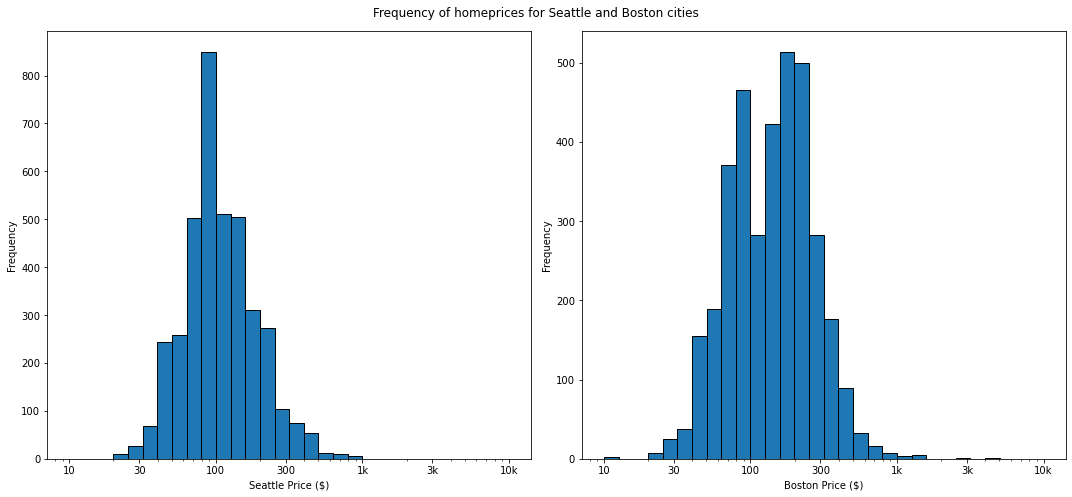

In [58]:
def histogram():
    '''
    1. Split the dataset for price based on city
    2. Plot a histogram of frequency of price
    '''
    
    bins = 10**np.arange(1,4.1, .1)
    x_ticks = [10,30,100,300,1000,3000,10000] 
    x_label = ['10', '30', '100', '300', '1k', '3k', '10k']

    plt.figure(figsize=(15,7));
    plt.subplot(1,2,1);
    plt.hist(df_listing['price($)'][df_listing.city == 'Seattle'], bins=bins, edgecolor= 'black');
    plt.xscale('log')

    plt.xticks(x_ticks, x_label);
    plt.xlabel('Seattle Price ($)');
    plt.ylabel('Frequency')

    plt.subplot(1,2,2)
    plt.hist(df_listing['price($)'][df_listing.city == 'Boston'], bins = bins, edgecolor= 'black');
    plt.xscale('log')

    plt.xticks(x_ticks, x_label);
    plt.xlabel('Boston Price ($)');
    plt.ylabel('Frequency') ;
    plt.suptitle('Frequency of homeprices for Seattle and Boston cities');
    plt.tight_layout();
    plt.savefig('histogram.png')
histogram()

__Answer__

Above are two histograms showing distributions of prices for two cities: Boston and Seattle.
Due to high skewness, I log-transformed the price column to produce a somewhat normal distribution. Outliers are evident in Boston's histogram both on the left around 10 dollars and on the right; around 1k dollars and above.

Apart from the outlier on the left, both cities seem to have the same least price for homestays: around 20 dollars, but Boston has a higher maximum price; around 2k dollars

From the plots, Seattle's modal price for home-stay is 100 dollars while Boston's is around 200 dollars.

We can see that Boston has a higher modal price for home-stay.

### QUESTION 2: How do room types affect price

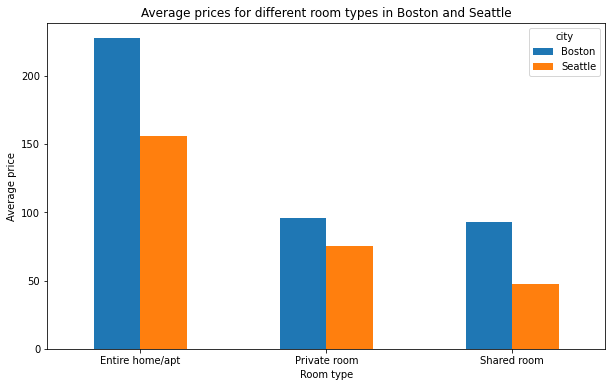

In [59]:
def clustered_bar_1():
    '''
    1. Aggregate the mean price of different room types based on city
    2. Plot a clustered bar chart
    '''
    
    pd.crosstab(index=df_listing.room_type, 
                columns=df_listing.city, 
                values=df_listing['price($)'], 
                aggfunc=np.average).plot(kind = 'bar', figsize = [10, 6])

    plt.xlabel('Room type');
    plt.ylabel('Average price') ;
    plt.xticks(rotation = 0)
    plt.title('Average prices for different room types in Boston and Seattle');
    plt.savefig('clustered_bar_1.png')
clustered_bar_1()

Above is a bar chart showing average price for different room types. I used pandas' crosstab function to get the total number of each room type for the two cities with their respective average prices.

We can see that for the three room types, Boston has a higher price than Seattle which reaffairms our earlier observation that Boston' modal price for rooms is higher that Seattle's.

1. For Entire home/apartment, Boston has an average price of around 250 dollars against 150 dollars for Seattle
2. Average price of Private room is around 90 dollars for Boston and 70 dollars for Seattle.
3. Average price of Shared room is around 80 dollars for Boston and about 40 dollars for Seattle.

### QUESTION  3: Does Accommodate(number of people for a room) for each room type affect the price?

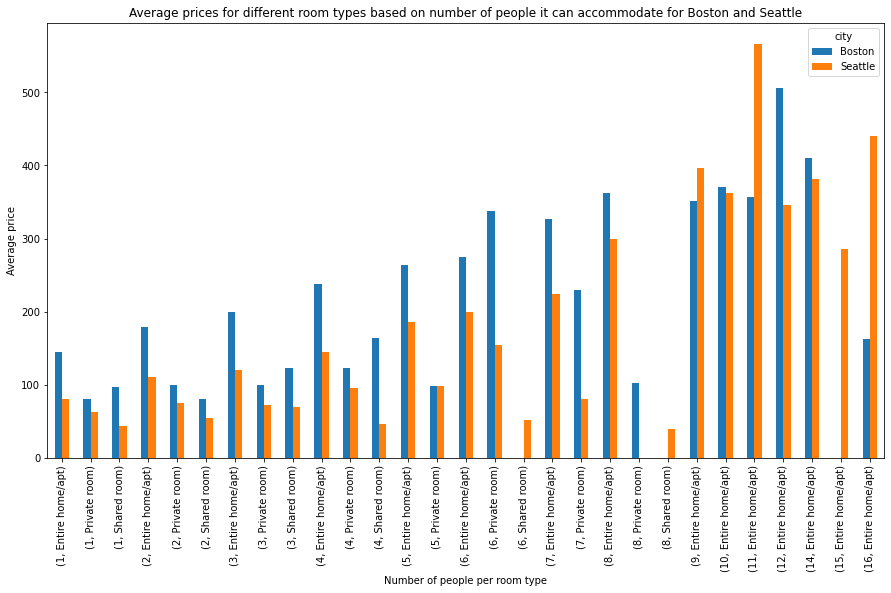

In [60]:
def clustered_bar_2():
    
    '''
    1. Aggregate the mean price of different room types based on the city 
    and the number of people it can accommodate
    
    2. Plot a clustered bar chart
    '''
    
    pd.crosstab(index=[df_listing.accommodates, df_listing.room_type],
                columns= df_listing.city, 
                values=df_listing['price($)'], 
                aggfunc= np.mean).plot(kind = 'bar',figsize = [15, 8]);
    plt.xlabel('Number of people per room type');
    plt.ylabel('Average price') ;

    plt.title('Average prices for different room types based on number of people it can accommodate for Boston and Seattle');
    plt.savefig('clustered_bar_2.png')
clustered_bar_2()

__Answer__

The above clustered bar chart shows average prices of different room types based on the number of people they can accommodate.
As can be seen, Entire home/apartment is the most frquent, followed by private room and shared room. 

We can see that increase in average prices for room types is directly proportional to the number of people they can accommodate 

### QUESTION 4: Which is the most used room type?

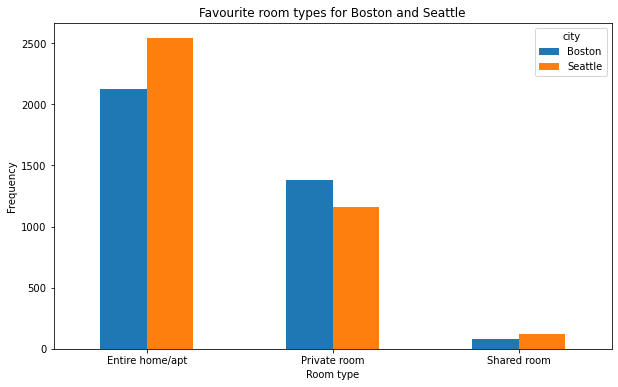

In [61]:
def clustered_graph_3():
    
    '''
    1. Get the of aggregate of different room types based on the city
    2. Plot a clustered bar chart
    '''
    
    pd.crosstab(index=df_listing.room_type, 
                columns=df_listing.city).plot(kind = 'bar', figsize = [10, 6])
    plt.xticks(rotation = 0)
    plt.xlabel('Room type');
    plt.ylabel('Frequency') ;
    
    plt.title('Favourite room types for Boston and Seattle');
    plt.savefig('clustered_bar_3.png')
clustered_graph_3()

Above is a bar chart showing average price for different room types. I also used pandas' crosstab function to get the frequency of frequently used room types for the two cities.

1. Entire home/apartment is the most used, with Seattle overlapping Boston.
2. Private room is the second most used. Boston overlaps Seattle here.
3. Shared room is rhe least used room type.

### QUESTION 5: Which is the most used room type based on number of people it can accommodate?

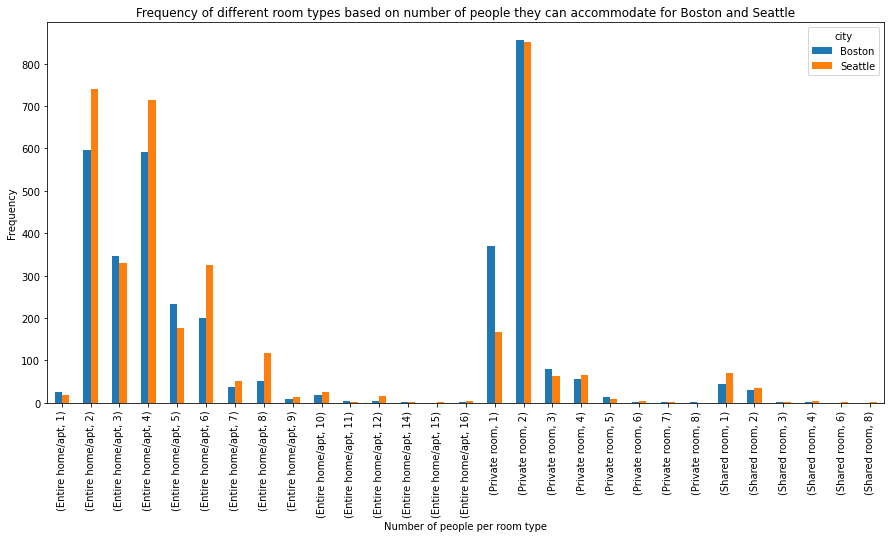

In [62]:
def clustered_bar_4():
    
    '''
    1. Get the aggregate of different room types based on 
    number of people it can accommodate and city
    2. Plot a clustered bar chart
    '''
    
    pd.crosstab(index=[df_listing.room_type, df_listing.accommodates],
                columns= df_listing.city).plot(kind = 'bar',figsize = [15, 7]);

    plt.xlabel('Number of people per room type');
    plt.ylabel('Frequency') ;
   
    plt.title('Frequency of different room types based on number of people they can accommodate for Boston and Seattle');
    plt.savefig('clustered_bar_4.png')
clustered_bar_4()

__Answer__

Private room which accommodates two people is equally the most used for the two cities

___
With the few analysis done above, it is clear that various factors relate with price. For all the useful columns in the `df_listing` dataset, let's see the top contributors to price.

The following will be done to achieve this:
1. Remove the unwanted columns
2. Replace NaNs with median for each numeric column
3. Create dummy variables out of features with object dtype
4. Build a linear model
5. Check top contributors through the model's coef_

In [63]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    
    1. Create X as all the columns that are not the price($) column
    2. Create y as the price($) column
    3. Drop the 'last_scraped', 'host_since','calendar_last_scraped','first_review', 'last_review', 'id', 'scrape_id', 'price($)' columns from X
    4. For each numeric variable in X, fill the column with the median value of the column.
    5. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values

    y = df['price($)']
    
    #Drop id and scape_id columns
    df = df.drop(['last_scraped', 
                  'host_since', 
                  'calendar_last_scraped',
                  'first_review', 
                  'last_review', 
                  'id', 
                  'scrape_id', 
                  'price($)'], axis=1)
    
    # Fill numeric columns with the median
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].median()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df_listing)    

In [64]:
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result

    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:

        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True)
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)

        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)

    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=2)
        plt.show()

    best_cutoff = max(results, key=results.get)

    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True)
    lm_model.fit(X_train, y_train)

    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

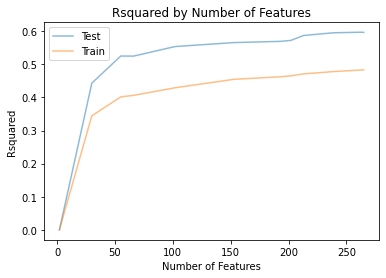

In [65]:
#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [100000000,10000, 1000, 500, 250, 150, 100, 90, 80, 70, 60, 58]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [66]:
print('Number of features used for Linear Regression:', X_train.shape[1]) #Number of columns
print('lm test score:', r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print('lm train score:', r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2

Number of features used for Linear Regression: 262
lm test score: 0.5971032580181883
lm train score: 0.482841045132542


In [67]:
def coef_weights_lm(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights_lm(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
43,host_about_ABOUT US:\r\n\r\nSeamlessTransition...,-3.786046e+15,3.786046e+15
37,host_name_Seamless,3.786046e+15,3.786046e+15
163,neighbourhood_cleansed_University District,-2.755158e+14,2.755158e+14
179,neighbourhood_group_cleansed_University District,2.755158e+14,2.755158e+14
181,city_Seattle,-4.644359e+13,4.644359e+13
221,market_Seattle,4.644359e+13,4.644359e+13
3,host_listings_count,9.958419e+11,9.958419e+11
4,host_total_listings_count,-9.958419e+11,9.958419e+11
259,cancellation_policy_super_strict_30,4.128272e+02,4.128272e+02
160,neighbourhood_cleansed_South Boston Waterfront,1.151877e+02,1.151877e+02


### Summary

In this notebook, I downloaded two data from Airbnb consisting of calendar, listing and review of homestay activities in Boston and Seattle cities. I cancatenated each of the three datasets together, wrangled and used the listing dataset for analysis. The following are the insights drawn from it:

1. Seattle's modal price for home-stay is lower than Boston's with a ratio of 100: about 200 (dollars)
2. Room types affect price for both cities with Entire home/apartment the highest contributor, followed by Private room and Shared room.
3. Number of people a room can accommodate is directly proportional to price
4. Private room is the most used room type in the two cities
5. The ten most contributors to price are `host_about`, `host_name`, and `neighbourhood_cleansed_University District`, `neighbourhood_group_cleansed_University`, `city_Seattle`, `market_Seattle`, `host_listings_count`, `host_total_listings_count`, `cancellation_policy_super_strict_30`, and `neighbourhood_cleansed_South`	